In [51]:
import monkdata as m
import dtree as tree
import numpy as np
import matplotlib.pyplot as mat

# entropy
ent1 = tree.entropy(m.monk1)
ent2 = tree.entropy(m.monk2)
ent3 = tree.entropy(m.monk3)
print(ent1, ent2, ent3)

1.0 0.957117428264771 0.9998061328047111


In [52]:
data = [m.monk1, m.monk2, m.monk3]
att = [m.attributes[0], m.attributes[1], m.attributes[2], m.attributes[3], m.attributes[4], m.attributes[5]]

# information gain per attribute
gain = []
for k in data:
    for l in att:
        gain.append(round(tree.averageGain(k, l),3))


print(gain)


[0.075, 0.006, 0.005, 0.026, 0.287, 0.001, 0.004, 0.002, 0.001, 0.016, 0.017, 0.006, 0.007, 0.294, 0.001, 0.003, 0.256, 0.007]


In [3]:
# split for A5 (most gain)
monk1_1 = tree.select(data[0], att[4], 1)
monk1_2 = tree.select(data[0], att[4], 2)
monk1_3 = tree.select(data[0], att[4], 3)
monk1_4 = tree.select(data[0], att[4], 4)

# don't check for A5
att2 = [m.attributes[0], m.attributes[1], m.attributes[2], m.attributes[3], m.attributes[5]]

# information gain for subsets
subset = [monk1_1, monk1_2, monk1_3, monk1_4]
gain_sub = []

for s in subset:
    for l in att2:
        gain_sub.append(round(tree.averageGain(s, l),3))

print(gain_sub)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.04, 0.015, 0.037, 0.049, 0.026, 0.033, 0.002, 0.018, 0.019, 0.045, 0.206, 0.034, 0.026, 0.076, 0.003]


In [4]:
# split for attributes with most information gain
# no split for first one
monk1_2_1 = tree.select(monk1_2, att2[3], 1) #fix A4
monk1_2_2 = tree.select(monk1_2, att2[3], 2)
monk1_2_3 = tree.select(monk1_2, att2[3], 3)

monk1_3_1 = tree.select(monk1_3, att2[4], 1) #fix A6
monk1_3_2 = tree.select(monk1_3, att2[4], 2) 

monk1_4_1 = tree.select(monk1_4, att2[0], 1) #fix A1
monk1_4_2 = tree.select(monk1_4, att2[0], 2)
monk1_4_3 = tree.select(monk1_4, att2[0], 3)


# find majority class
maj1_1 = tree.mostCommon(monk1_1)

maj1_2_1 = tree.mostCommon(monk1_2_1)
maj1_2_2 = tree.mostCommon(monk1_2_2)
maj1_2_3 = tree.mostCommon(monk1_2_3)

maj1_3_1 = tree.mostCommon(monk1_3_1)
maj1_3_2 = tree.mostCommon(monk1_3_2)

maj1_4_1 = tree.mostCommon(monk1_4_1)
maj1_4_2 = tree.mostCommon(monk1_4_2)
maj1_4_3 = tree.mostCommon(monk1_4_3)

# check with build in function
tree.buildTree(data[0], m.attributes,2)

A5(+A4(---)A6(--)A1(--+))

In [53]:
# build full tree for every data set
t1 = tree.buildTree(data[0], m.attributes)
print(t1)
t2 = tree.buildTree(data[1], m.attributes)
print(t2)
t3 = tree.buildTree(data[2], m.attributes)
print(t3)

# compute performance
# training set
print(tree.check(t1, data[0]))
print(tree.check(t2, data[1]))
print(tree.check(t3, data[2]))

# test set
test = [m.monk1test, m.monk2test, m.monk3test]
print(1-tree.check(t1, test[0]))
print(1-tree.check(t2, test[1]))
print(1-tree.check(t3, test[2]))

A5(+A4(A1(A2(+--)A2(-++)A2(--+))A2(-+-)A3(A1(A2(+--)+A2(-++))A2(--A1(--+))))A6(A4(A3(A1(A2(+--)A2(-+-)-)-)A1(A2(+--)--)-)A3(A4(A1(+--)A1(-++)+)A1(-A2(-+-)A2(--+))))A1(A2(+--)A2(-+-)A2(+-+)))
A5(A3(A6(-A1(-A2(--A4(--+))A2(-A4(-+-)-)))A4(A2(--A1(-+-))+A1(A2(-A6(-+)-)A2(A6(-+)++)+)))A3(A4(A2(-+-)A6(A1(--+)+)A1(A2(-++)++))A2(A4(++A1(+-A6(+-)))-A1(+A4(+--)-)))A3(A6(A1(-A4(-++)A4(--+))A2(+A1(+-A4(+--))A4(A1(-++)A1(+--)-)))A4(A2(A6(-+)A6(+-)A1(A6(-+)++))A1(A2(-+-)--)A1(A6(+-)--)))A2(A6(-A1(+-A4(++-)))A1(A4(-A3(-+)A3(A6(-+)A6(+-)))A3(+A6(+-))-)A3(A4(--+)-)))
A2(A5(++A4(A1(--+)++)-)A5(+A1(+A4(+-+)+)A3(A4(+A1(--+)A1(+--))+)-)A4(A5(--+A1(--+))--))
1.0
1.0
1.0
0.17129629629629628
0.30787037037037035
0.05555555555555558


[0.9078703703703702, 0.9361111111111111, 0.9541666666666668, 0.9731481481481481, 0.9666666666666666, 0.9611111111111109]
[0.0030712019890260624, 0.004191529492455417, 0.00217956961591221, 0.0005221193415637861, 0.0003978052126200278, 0.0014197530864197543]


Text(0, 0.5, 'variance')

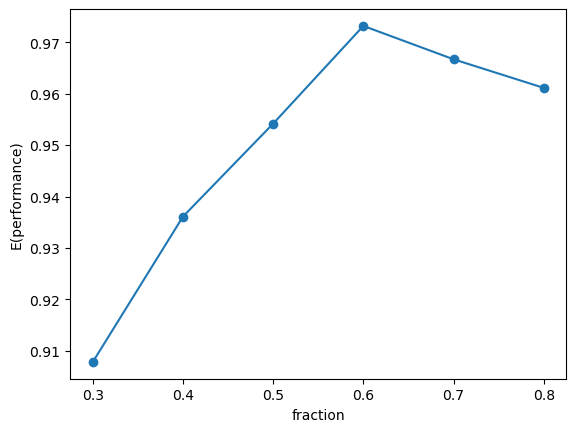

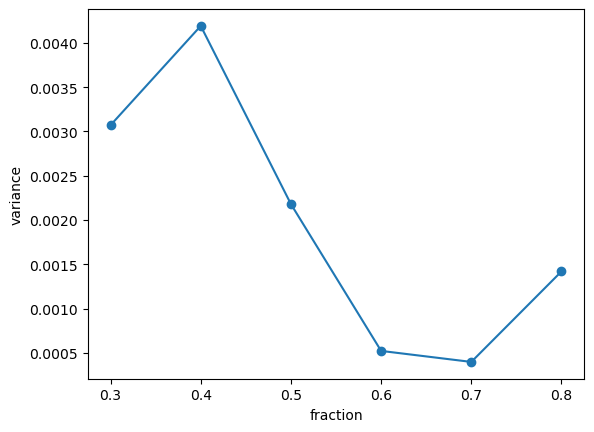

In [69]:
# divide into train and val data
import random

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]


mean = []
var = []
frac = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for f in frac:
    # find better pruned
    nr_rounds = 10
    testError = []

    for n in range(nr_rounds):
        # split data
        monk1train, monk1val = partition(m.monk3, f)

        # find full tree
        t1 = tree.buildTree(monk1train, m.attributes)
        flag = 1
        # find best tree
        while(flag):
            flag = 0
            opt= tree.allPruned(t1)
            thres = tree.check(t1, monk1val)
            perf = []
            for o in opt:
                perf.append(tree.check(o, monk1val))

            # find best performance in opt
            best = 0
            for p in perf:
                if p > best:
                    best = p
            if thres <= best:
                t1 = opt[perf.index(best)]
                flag = 1
        testError.append(tree.check(t1, test[2]))
    mean.append(np.mean(testError))
    var.append(np.var(testError))
print(mean)
print(var)

mat.figure(1)
mat.plot(frac, mean, '-o')
mat.xlabel('fraction')
mat.ylabel('E(performance)')

mat.figure(2)
mat.plot(frac, var, '-o')
mat.xlabel('fraction')
mat.ylabel('variance')
